In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss 

In [2]:
# pip install ydata_profiling

In [4]:
# pip install pmdarima

# TELEMETRY DATASET

In [2]:
df = pd.read_csv("PdM_telemetry.csv")
df1 = pd.read_csv("PdM_machines.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [6]:
df.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [7]:
df.isnull().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.sort_values(by='datetime')

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df[df['datetime'].dt.year != 2016]

C:\Users\AKUMRA\AppData\Local\Temp\ipykernel_572\979243234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

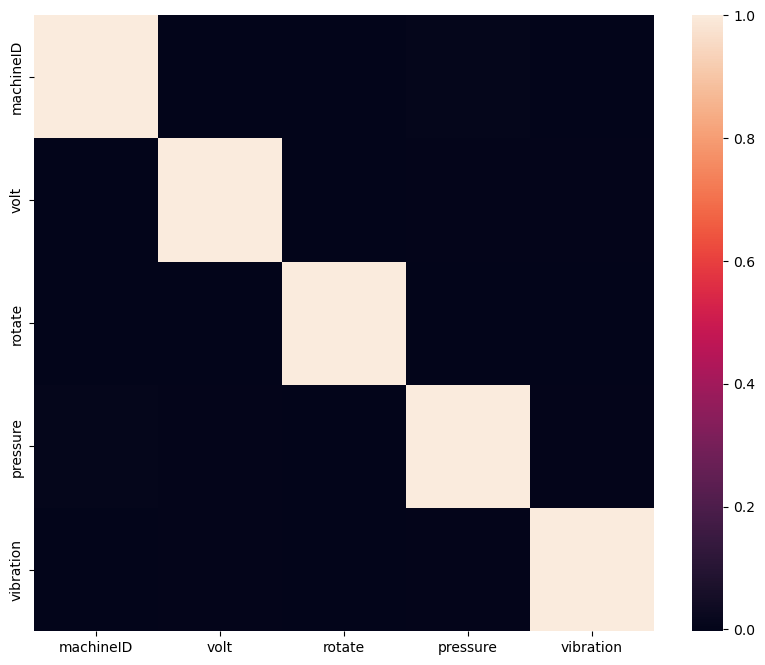

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

Visualization for attribute 'pressure'

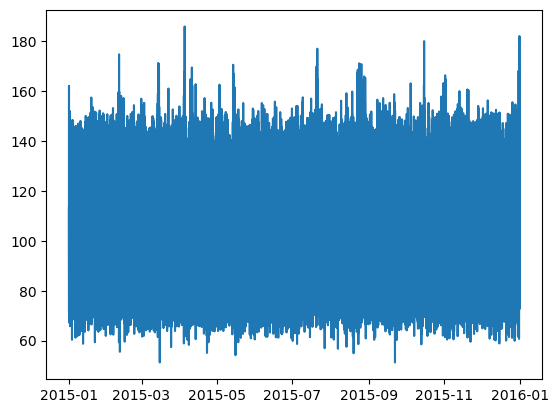

<Figure size 2000x1000 with 0 Axes>

In [12]:
#overall variation of pressure for the entire year
plt.plot(df['datetime'],df['pressure'])
plt.figure(figsize=(20,10))
plt.show()

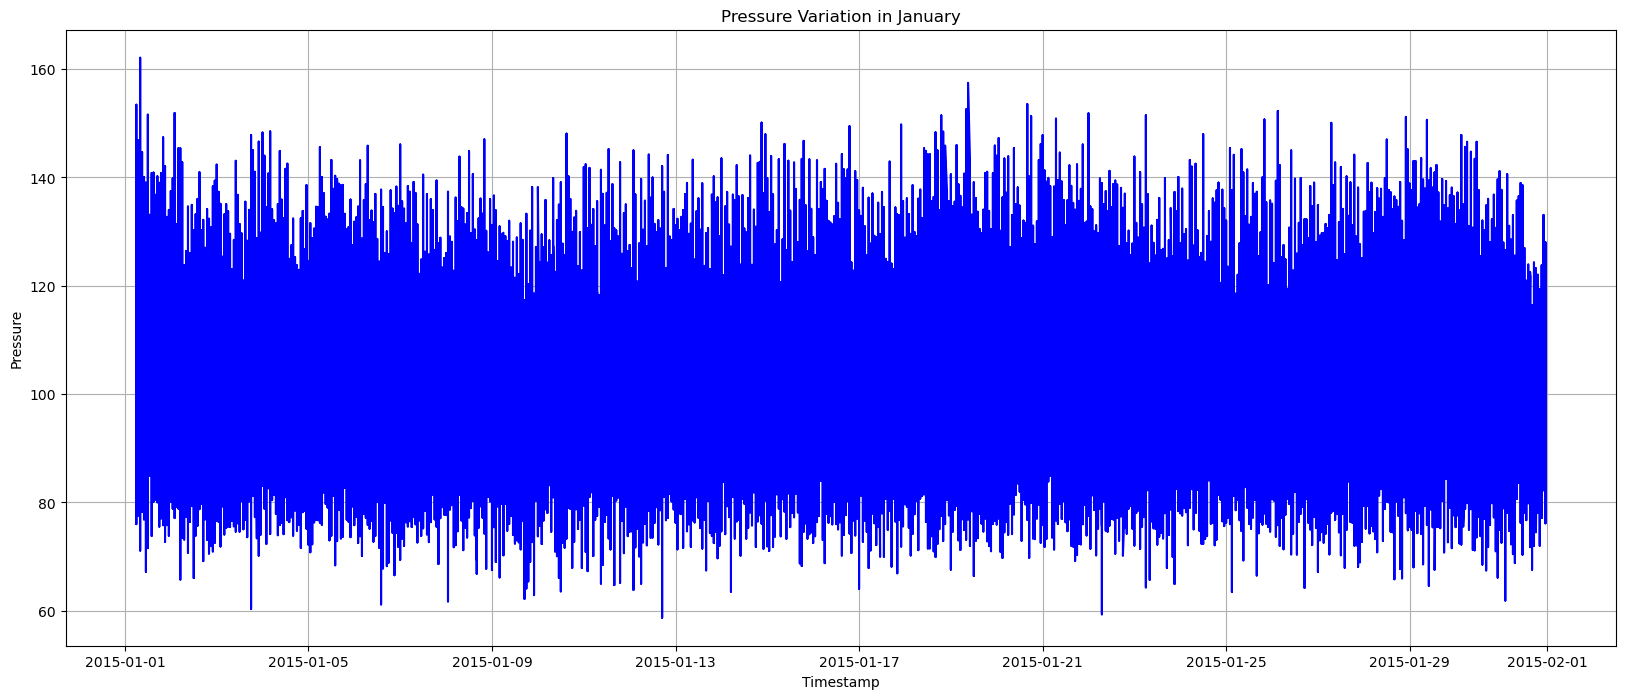

In [13]:
#variation of pressure for january 
df['datetime'] = pd.to_datetime(df['datetime'])

january_data = df[df['datetime'].dt.month == 1]

plt.figure(figsize=(20, 8))
plt.plot(january_data['datetime'], january_data['pressure'], color='blue')

plt.title('Pressure Variation in January')
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.grid(True)

plt.show()

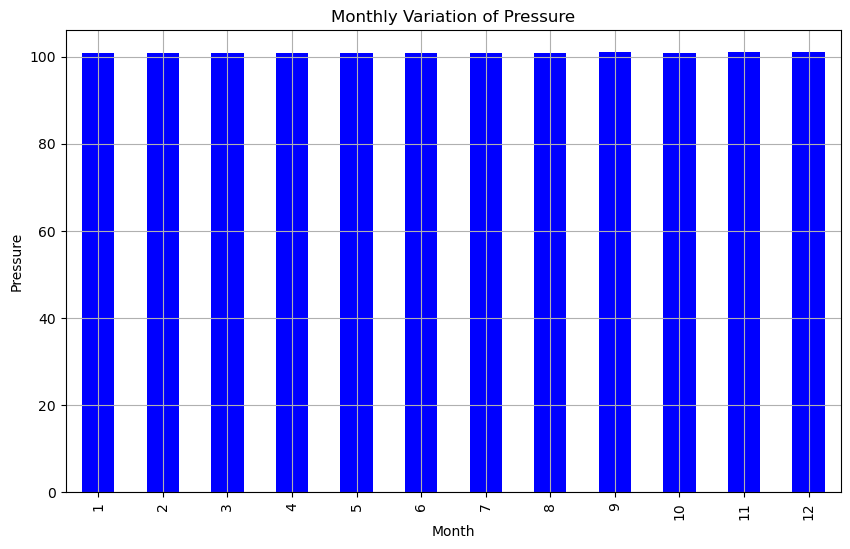

In [14]:
#monthly variation of pressure: taking the mean value 
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['datetime'].dt.month

monthly_pressure = df.groupby('month')['pressure'].mean()
plt.figure(figsize=(10, 6))
monthly_pressure.plot(kind='bar', color='blue')
plt.title('Monthly Variation of Pressure')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.grid(True)

plt.show()

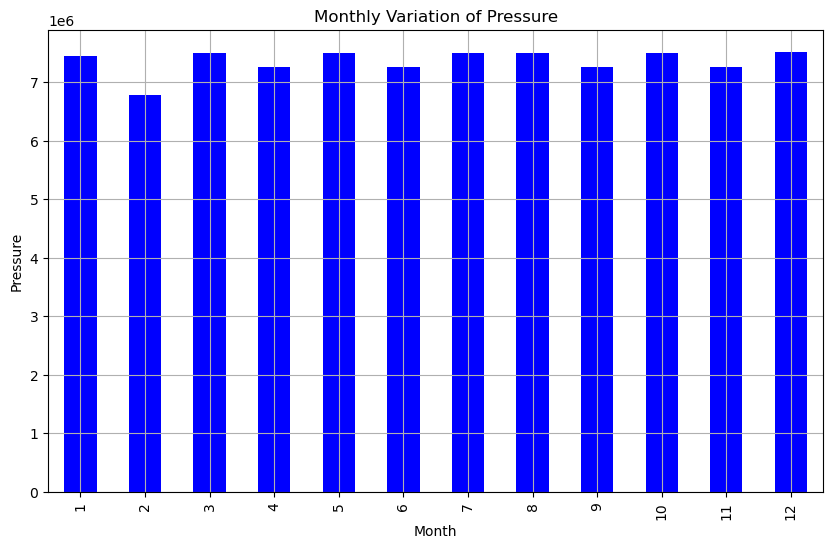

In [15]:
#bar plot for monthly variation of pressure: taking the sum of pressure of each month
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['datetime'].dt.month

monthly_pressure = df.groupby('month')['pressure'].sum()
plt.figure(figsize=(10, 6))
monthly_pressure.plot(kind='bar', color='blue')
plt.title('Monthly Variation of Pressure')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.grid(True)

plt.show()

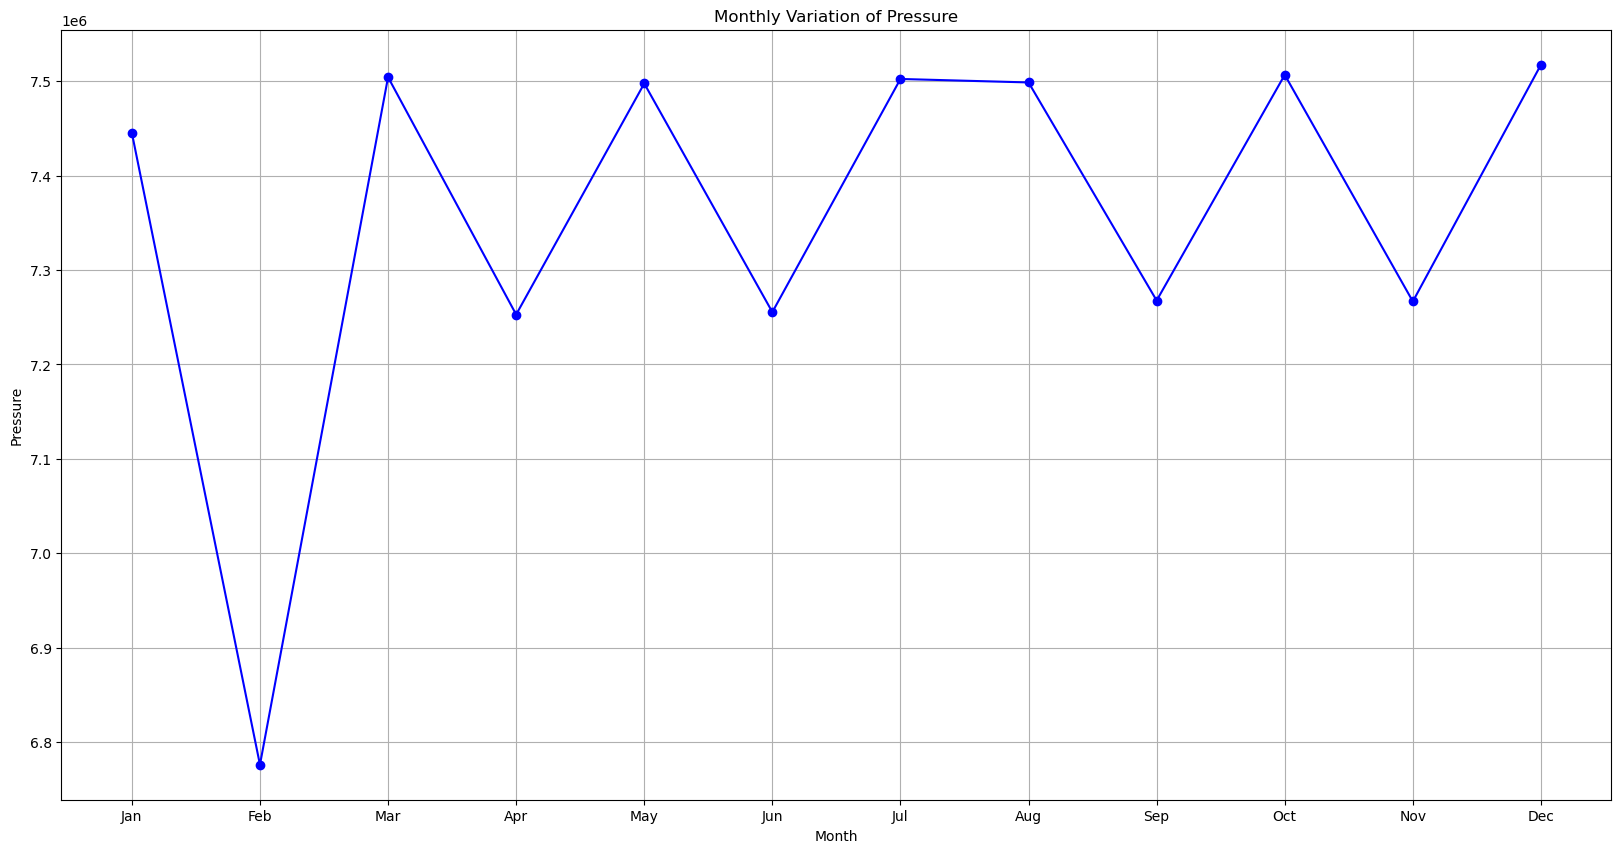

In [16]:
#line plot for monthly variation of pressure: taking the sum of pressure of each month
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['datetime'].dt.month

monthly_pressure = df.groupby('month')['pressure'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.figure(figsize=(20, 10))
plt.plot(monthly_pressure.index, monthly_pressure.values, color='blue', marker='o')

plt.title('Monthly Variation of Pressure')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.xticks(monthly_pressure.index, month_names)
plt.grid(True)

plt.show()

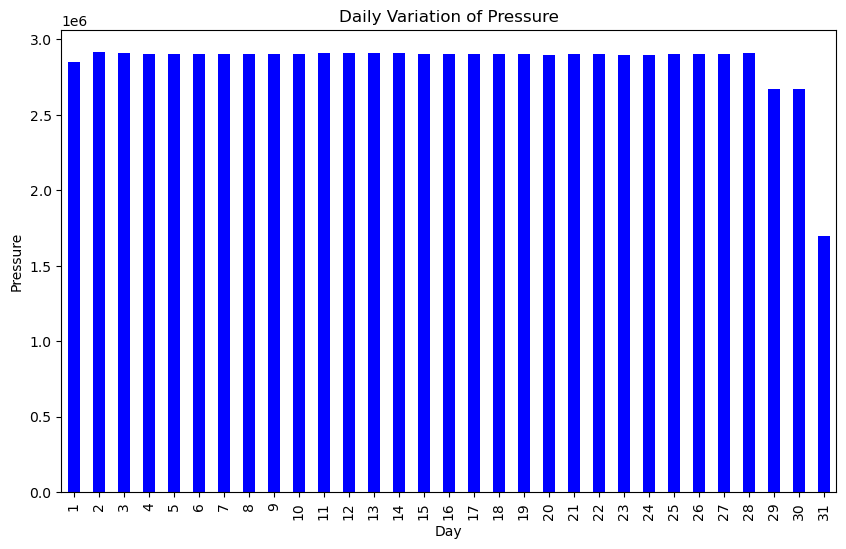

In [17]:
#variation of pressure wrt each day 
df['datetime'] = pd.to_datetime(df['datetime'])

df['day'] = df['datetime'].dt.day

daily_pressure = df.groupby('day')['pressure'].sum()

plt.figure(figsize=(10, 6))
daily_pressure.plot(kind='bar', color='blue')
plt.title('Daily Variation of Pressure')
plt.xlabel('Day')
plt.ylabel('Pressure')
# plt.grid(True)
plt.show()

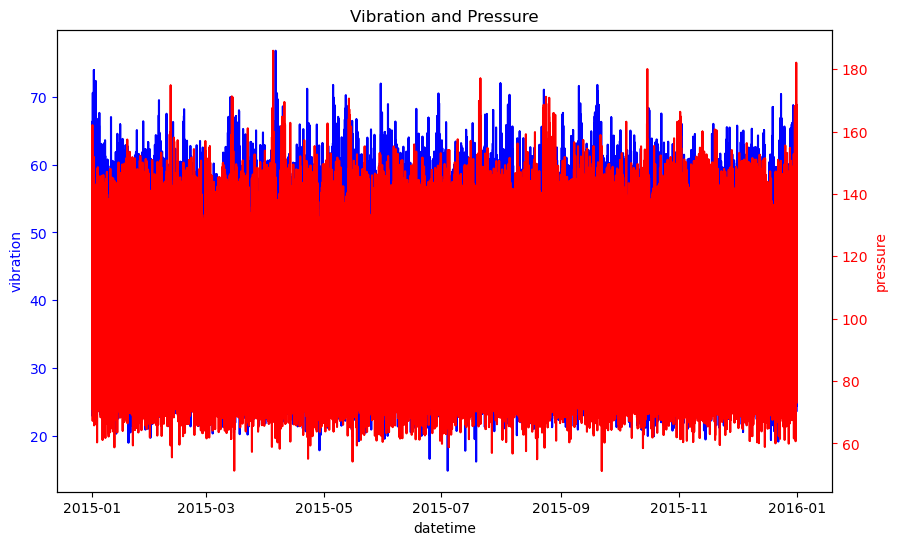

In [18]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['datetime'], df['vibration'], color='blue')
ax1.set_xlabel('datetime')
ax1.set_ylabel('vibration', color='blue')
ax1.tick_params(axis='y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(df['datetime'], df['pressure'], color='red')
ax2.set_ylabel('pressure', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Vibration and Pressure')
# plt.grid(True)

plt.show()

In [19]:
# df.plot(x='datetime', y=['vibration', 'pressure', 'volt', 'rotate'], figsize=(10, 6))

# plt.title('Variation of vibration and pressure Columns')
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.grid(True)
# plt.show()


In [20]:
# df['machineID'].unique()

<Axes: xlabel='machineID'>

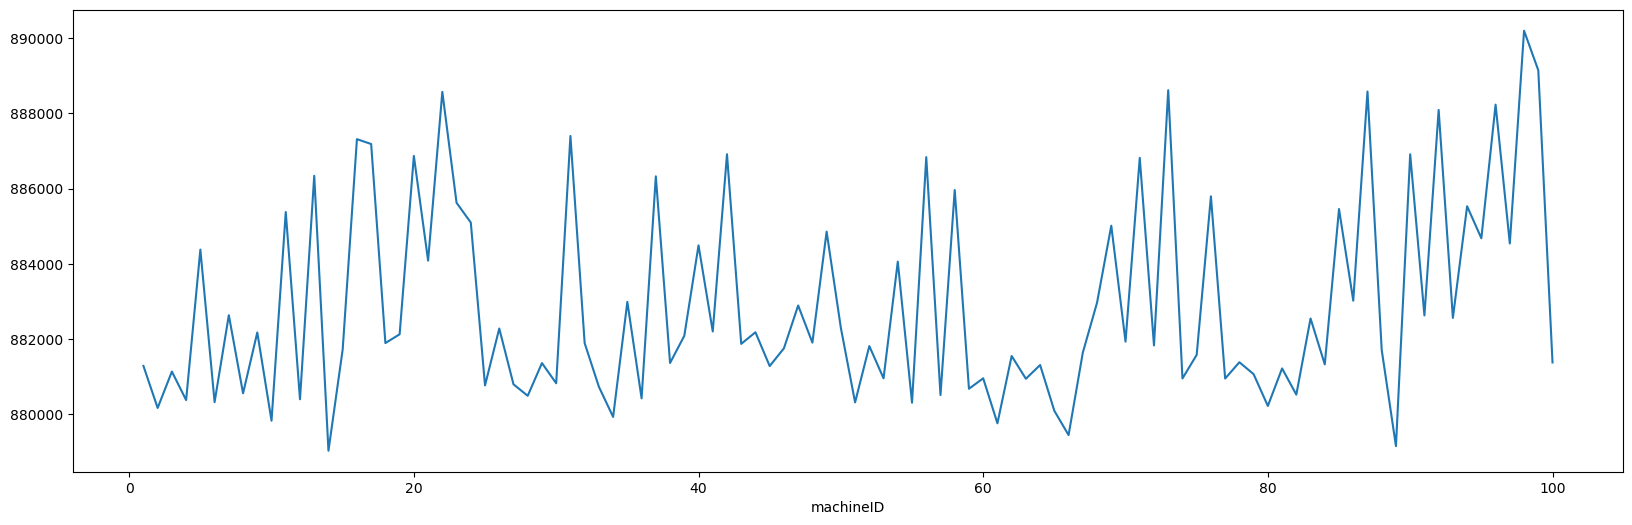

In [21]:
#variation of average pressure of each machine 
avg_pressure = df.groupby('machineID')['pressure'].sum()
plt.figure(figsize=(20,6))
avg_pressure.plot(kind='line')

<Axes: xlabel='machineID'>

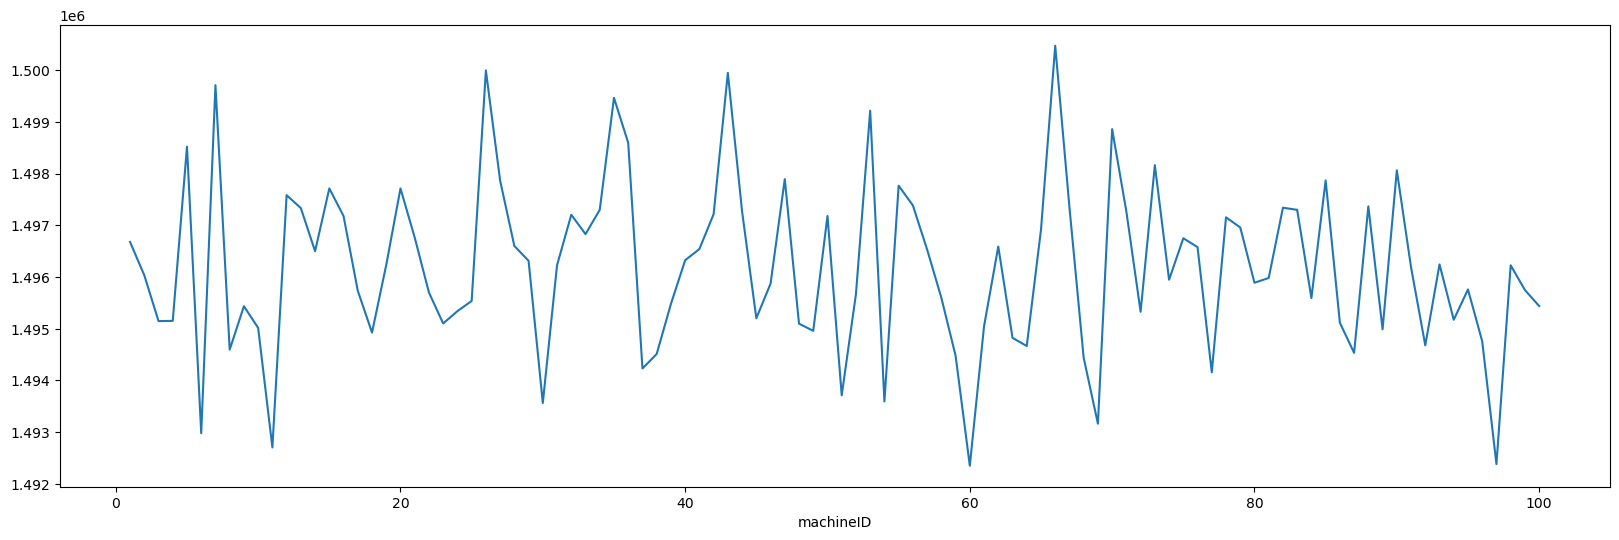

In [73]:
avg_voltage = df.groupby('machineID')['volt'].sum()
plt.figure(figsize=(20,6))
avg_voltage.plot(kind='line')

<Axes: xlabel='machineID'>

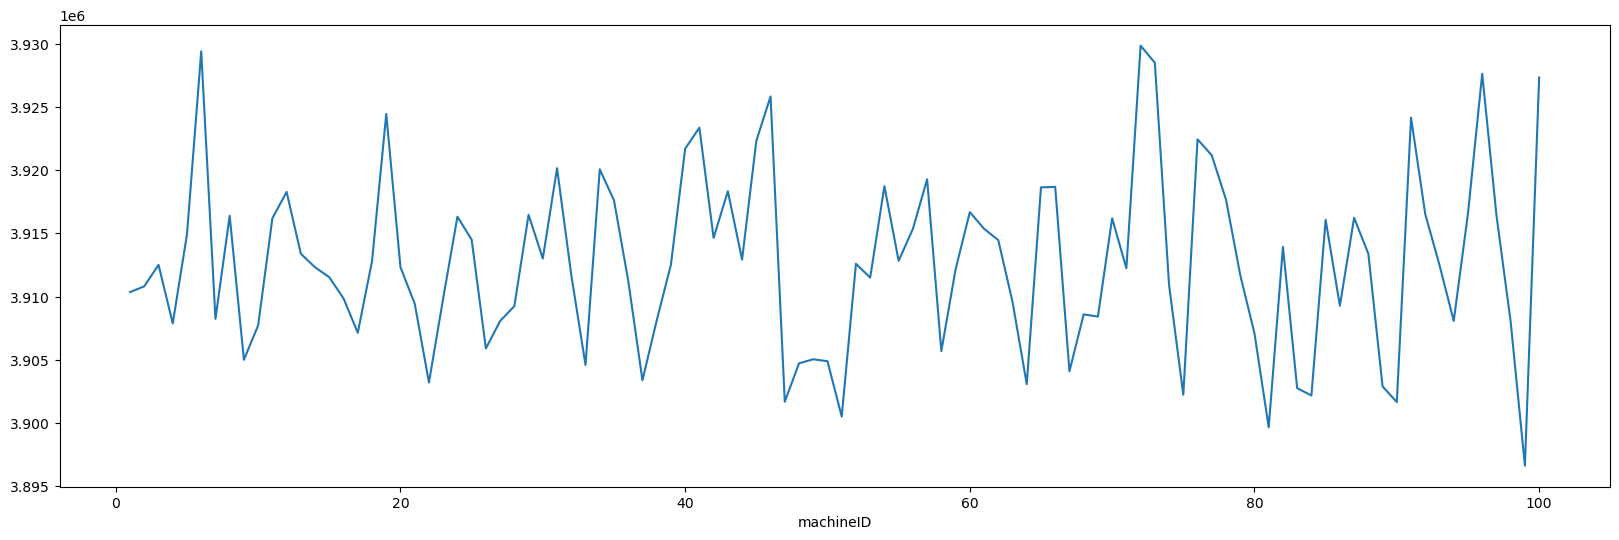

In [74]:
avg_rotation = df.groupby('machineID')['rotate'].sum()
plt.figure(figsize=(20,6))
avg_rotation.plot(kind='line')

Visualisation for vibration

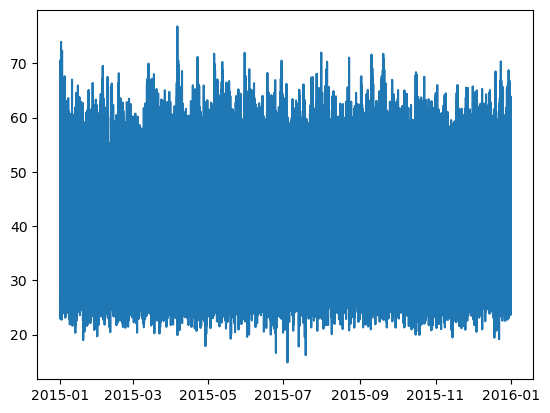

<Figure size 2000x800 with 0 Axes>

In [22]:
#overall variation of vibration for the entire year
plt.plot(df['datetime'],df['vibration'])
plt.figure(figsize=(20,8))
plt.show()

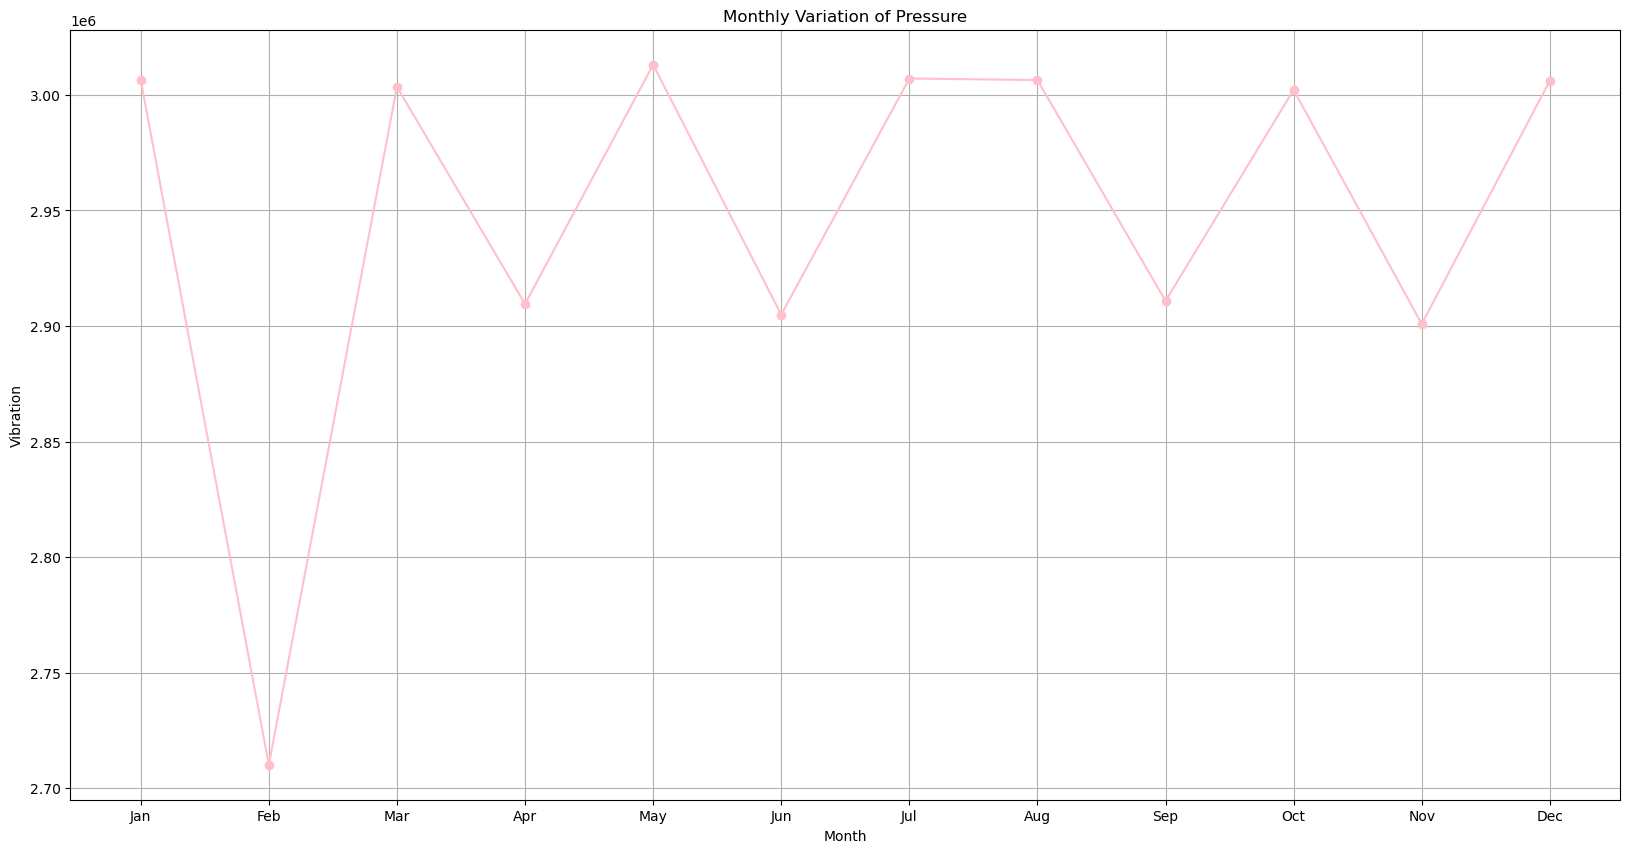

In [68]:
#line plot for monthly variation of vibration: taking the sum of pressure of each month
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['datetime'].dt.month

monthly_vibration = df.groupby('month')['vibration'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.figure(figsize=(20, 10))
plt.plot(monthly_vibration.index, monthly_vibration.values, color='pink', marker='o')

plt.title('Monthly Variation of Pressure')
plt.xlabel('Month')
plt.ylabel('Vibration')
plt.xticks(monthly_vibration.index, month_names)
plt.grid(True)

plt.show()

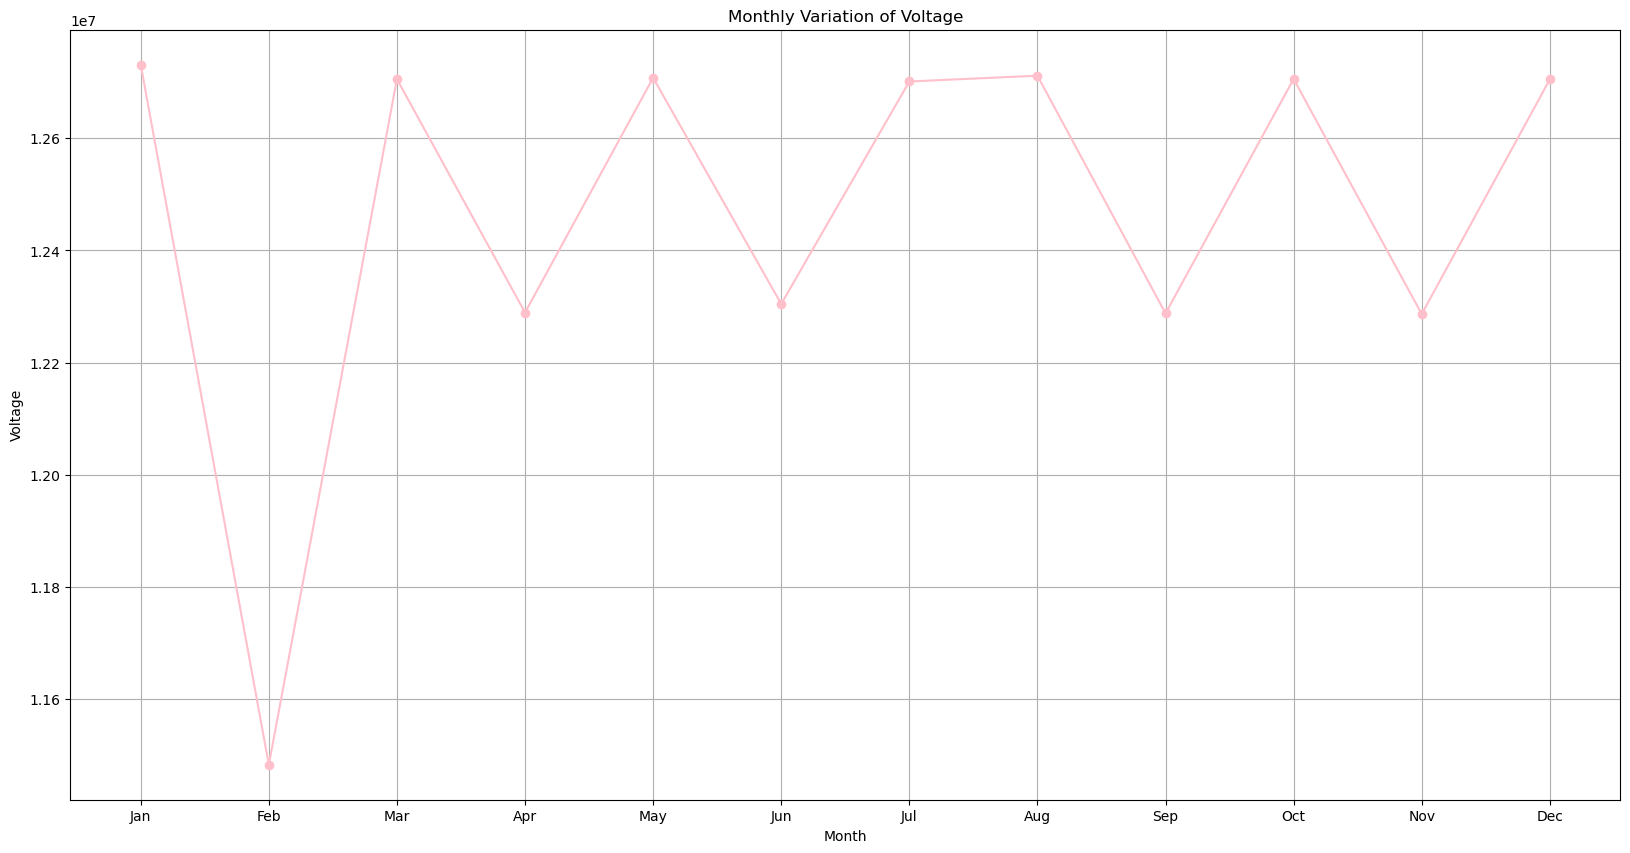

In [69]:
volt=df.groupby('month')['volt'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(20, 10))
plt.plot(volt.index, volt.values, color='pink', marker='o')

plt.title('Monthly Variation of Voltage')
plt.xlabel('Month')
plt.ylabel('Voltage')
plt.xticks(volt.index, month_names)
plt.grid(True)

plt.show()

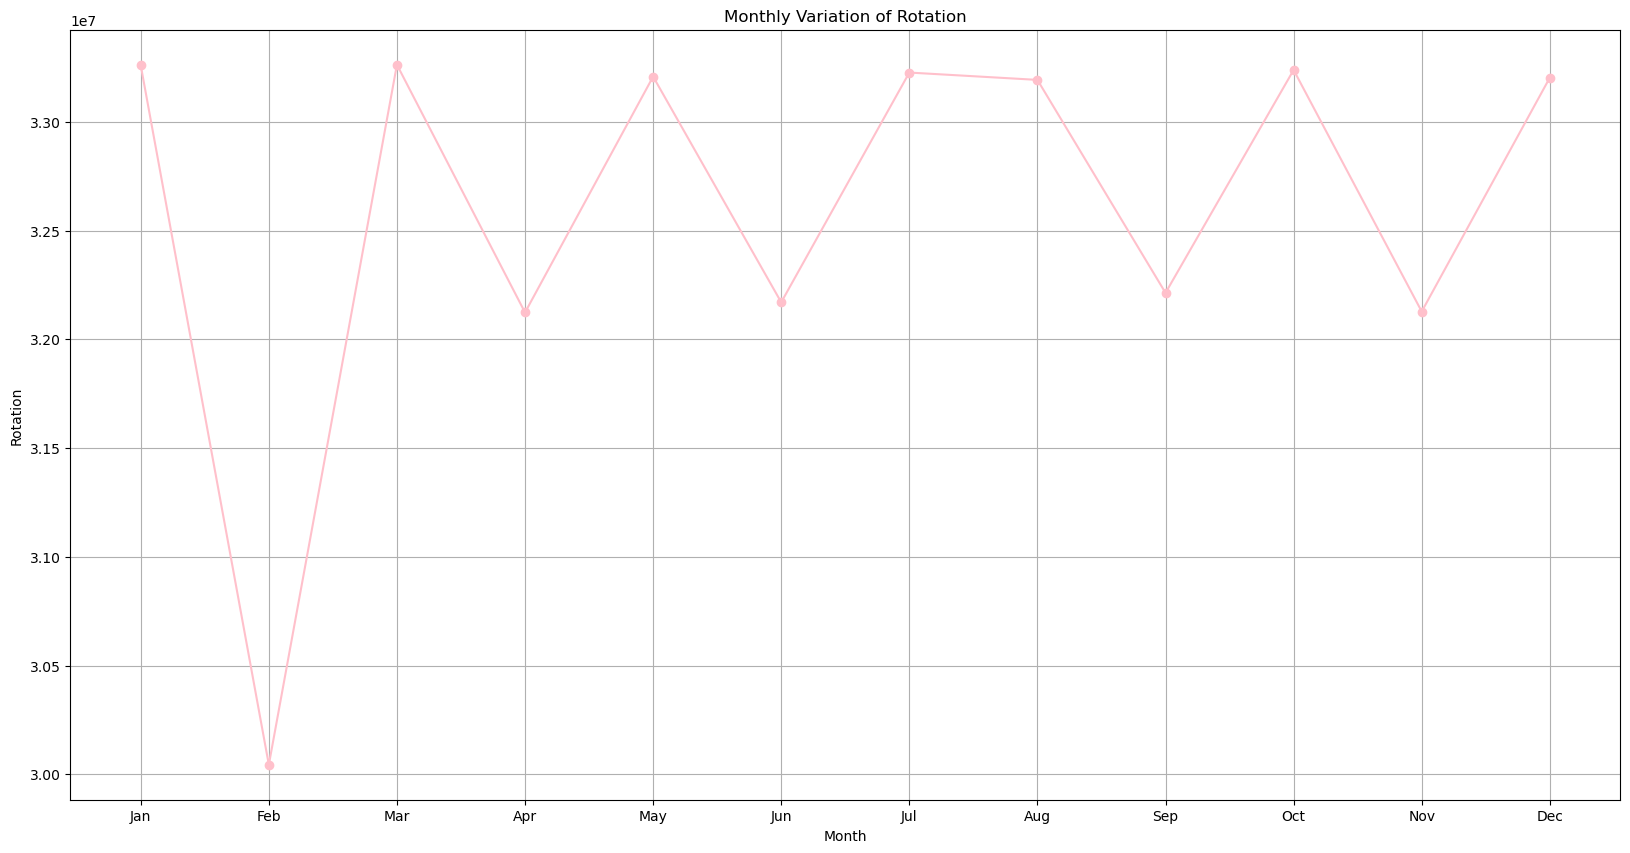

In [70]:
rotate=df.groupby('month')['rotate'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(20, 10))
plt.plot(rotate.index, rotate.values, color='pink', marker='o')

plt.title('Monthly Variation of Rotation')
plt.xlabel('Month')
plt.ylabel('Rotation')
plt.xticks(rotate.index, month_names)
plt.grid(True)

plt.show()

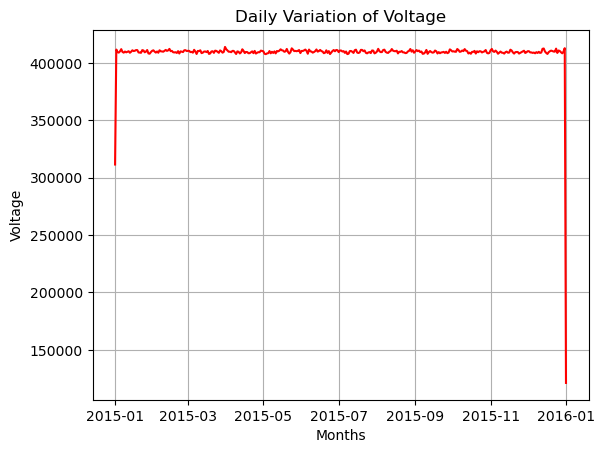

<Figure size 2000x1000 with 0 Axes>

In [78]:
Plot, Axis = plt.subplots()
df['date'] = df['datetime'].dt.date
# date=df.groupby('datetime')['volt'].sum()
volt=df.groupby('date')['volt'].sum()
plt.plot(volt.index, volt.values, color='red')
 
plt.title('Daily Variation of Voltage')
plt.xlabel('Months')
plt.ylabel('Voltage')
# plt.xticks(monthly_pressure.index, month_names)
plt.grid(True)
plt.plot()
plt.figure(figsize=(20, 10))
# slider_position.on_changed(update)
plt.show()

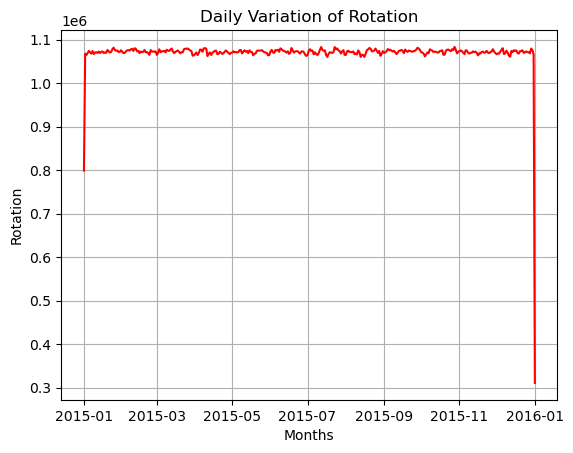

<Figure size 2000x1000 with 0 Axes>

In [82]:
df['date'] = df['datetime'].dt.date
# date=df.groupby('datetime')['volt'].sum()
volt=df.groupby('date')['rotate'].sum()
plt.plot(volt.index, volt.values, color='red')
# axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],)
# slider_position = Slider(axis_position,'Pos', 0.1, 90.0)
# def update(val):
#     pos = slider_position.val
#     Axis.axis([pos, pos+1, 0, 1])
#     Plot.canvas.draw_idle()
 
plt.title('Daily Variation of Rotation')
plt.xlabel('Months')
plt.ylabel('Rotation')

# plt.xticks(monthly_pressure.index, month_names)
plt.grid(True)
plt.plot()
plt.figure(figsize=(20, 10))
# slider_position.on_changed(update)
plt.show()

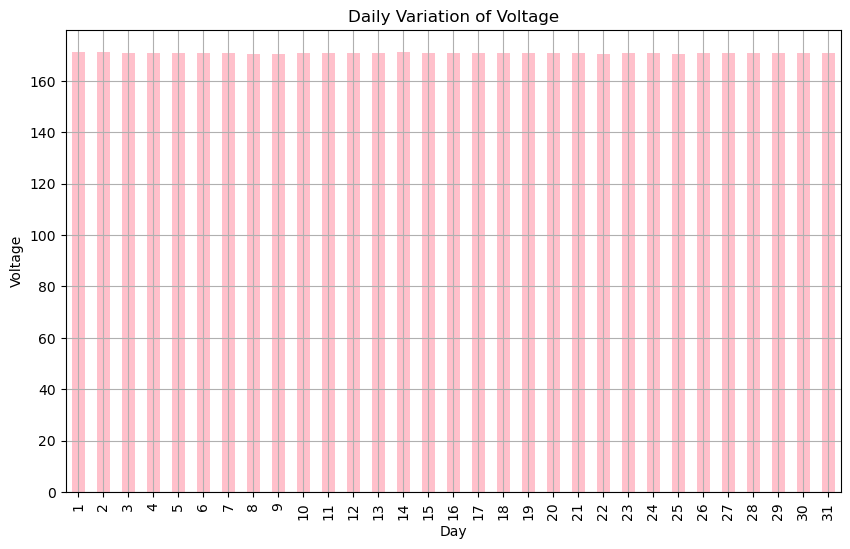

In [64]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['day'] = df['datetime'].dt.day

daily_volt = df.groupby('day')['volt'].mean()

plt.figure(figsize=(10, 6))
daily_volt.plot(kind='bar', color='pink')
plt.title('Daily Variation of Voltage')
plt.xlabel('Day')
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

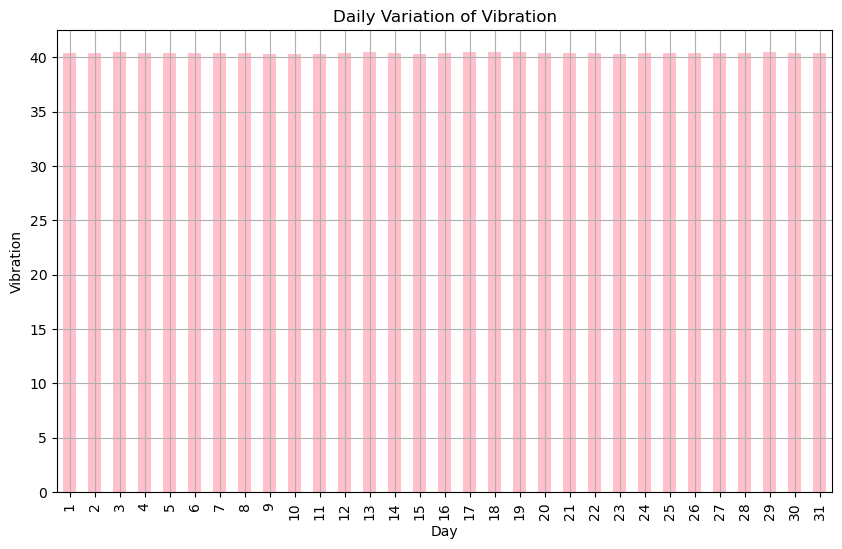

In [24]:
#daily vibration values: taking summation 
df['datetime'] = pd.to_datetime(df['datetime'])

df['day'] = df['datetime'].dt.day

daily_vib = df.groupby('day')['vibration'].mean()

plt.figure(figsize=(10, 6))
daily_vib.plot(kind='bar', color='pink')
plt.title('Daily Variation of Vibration')
plt.xlabel('Day')
plt.ylabel('Vibration')
plt.grid(True)
plt.show()

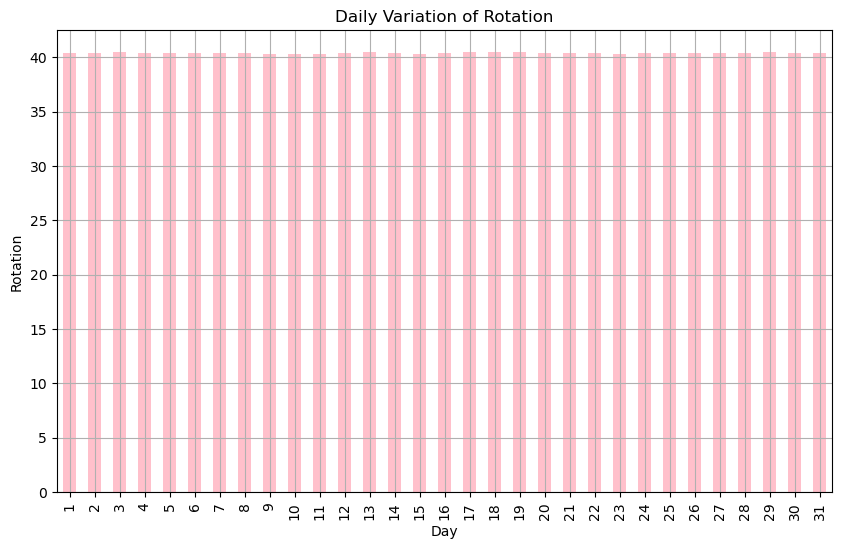

In [71]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['day'] = df['datetime'].dt.day

daily_rot = df.groupby('day')['rotate'].mean()

plt.figure(figsize=(10, 6))
daily_vib.plot(kind='bar', color='pink')
plt.title('Daily Variation of Rotation')
plt.xlabel('Day')
plt.ylabel("Rotation")
plt.grid(True)
plt.show()

In [25]:
#the value indicates that there is a positive correlation between the two attributes 
correlation = df['pressure'].corr(df['vibration'])
print(correlation)

0.0013900380717610256


<Axes: xlabel='machineID'>

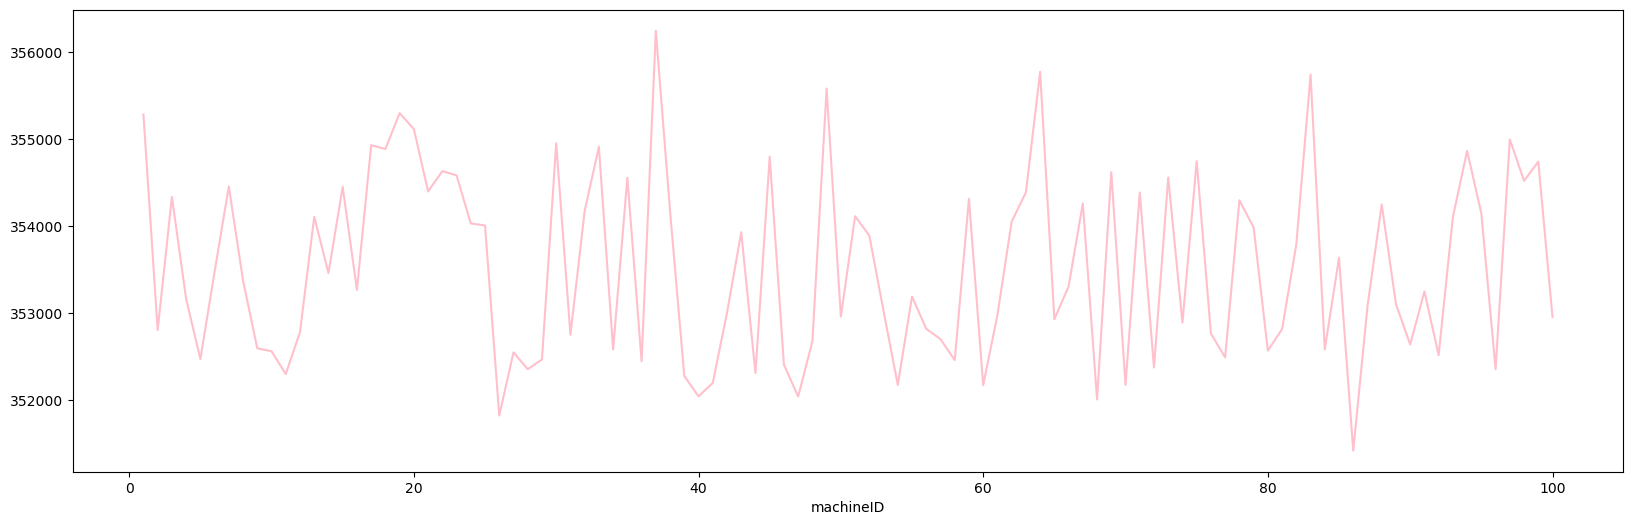

In [26]:
avg_vib = df.groupby('machineID')['vibration'].sum()
plt.figure(figsize=(20,6))
avg_vib.plot(kind='line', color='pink')

combining telemetry and machines

In [27]:
df2=pd.merge(df, df1)
df2.head()

,datetime,machineID,volt,rotate,pressure,vibration,month,day,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,1,1,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,1,1,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,1,1,model3,18
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,1,1,model3,18
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,1,1,model3,18


In [28]:
corr1 = df1['age'].corr(df['pressure'])
print(corr1)

-0.016014082531415733


In [29]:
corr2=df1['age'].corr(df['vibration'])
print(corr1)

-0.016014082531415733


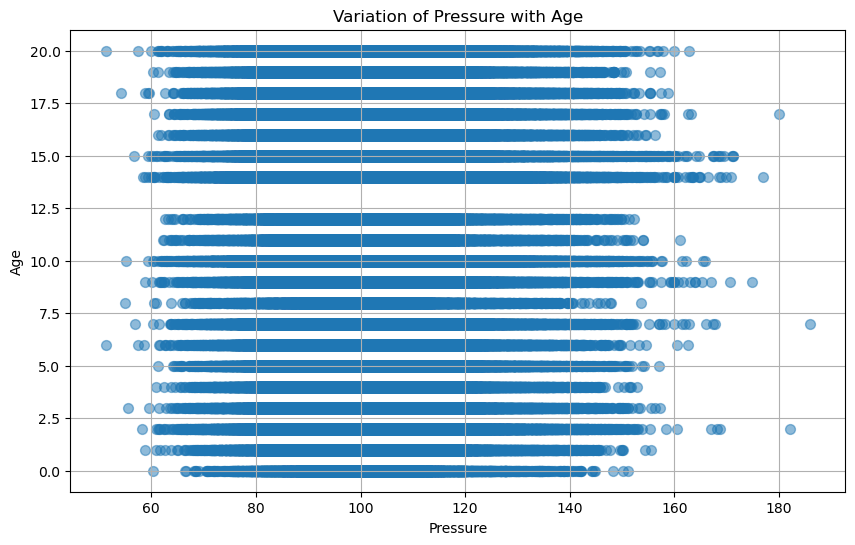

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'data'
# with columns 'age' and 'pressure'

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['pressure'], df2['age'], s=50, alpha=0.5)

# Customize the plot
plt.title('Variation of Pressure with Age')
plt.xlabel('Pressure')
plt.ylabel('Age')
plt.grid(True)

# Show the plot
plt.show()

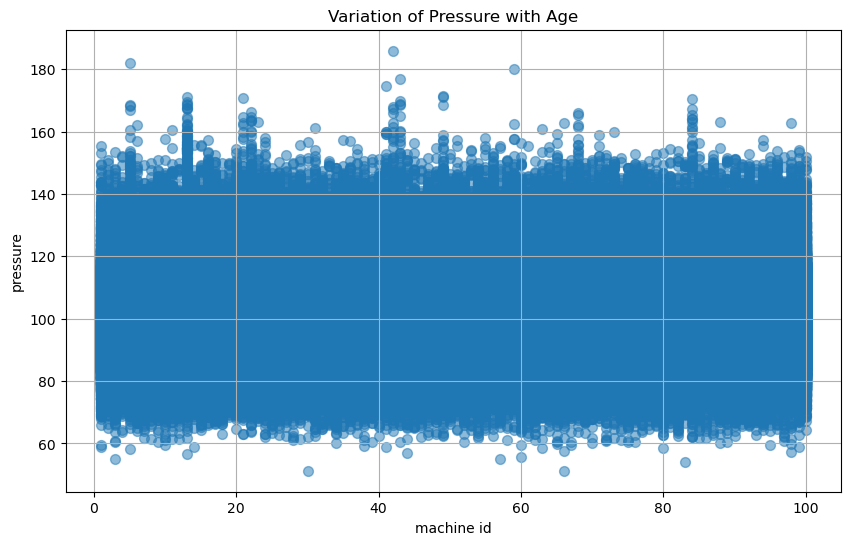

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['machineID'], df2['pressure'], s=50, alpha=0.5)

plt.title('Variation of Pressure with Age')
plt.xlabel('machine id')
plt.ylabel('pressure')
plt.grid(True)

plt.show()

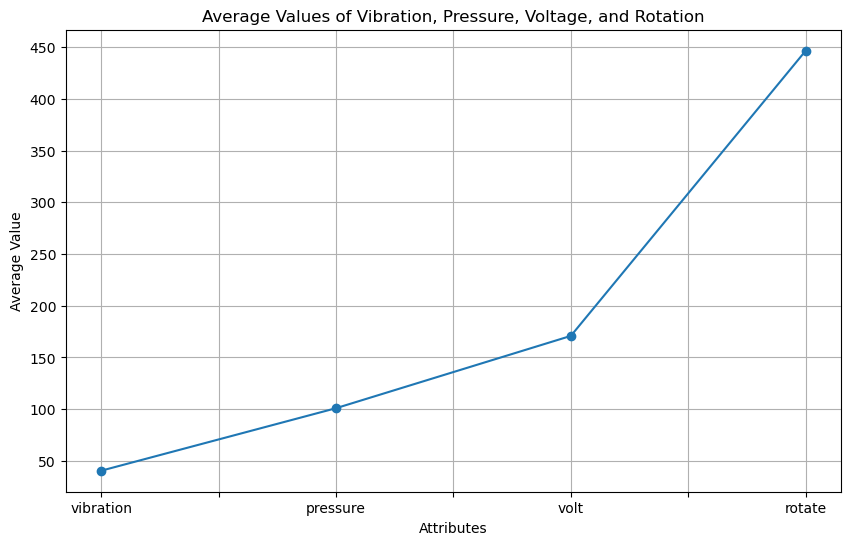

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'data'
# with columns 'vibration', 'pressure', 'volt', and 'rotate'

# Calculate the average of each attribute
averages = df[['vibration', 'pressure', 'volt', 'rotate']].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
averages.plot(kind='line', marker='o')

# Customize the plot
plt.title('Average Values of Vibration, Pressure, Voltage, and Rotation')
plt.xlabel('Attributes')
plt.ylabel('Average Value')
plt.grid(True)

# Show the plot
plt.show()


In [33]:
df['datetime']=df['datetime'].astype(str)
print(df['datetime'])

0         2015-01-01 06:00:00
455572    2015-01-01 06:00:00
858578    2015-01-01 06:00:00
96371     2015-01-01 06:00:00
43805     2015-01-01 06:00:00
                 ...         
131407    2015-12-31 23:00:00
43797     2015-12-31 23:00:00
446803    2015-12-31 23:00:00
306627    2015-12-31 23:00:00
735916    2015-12-31 23:00:00
Name: datetime, Length: 875400, dtype: object


In [34]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [35]:
# import ydata_profiling
# ydata_profiling.ProfileReport(df)

In [36]:
daily_data = df.resample('D').mean()
print(daily_data)

            machineID        volt      rotate    pressure  vibration  month  \
datetime                                                                      
2015-01-01       50.5  173.056591  443.745266  102.328359  40.559718    1.0   
2015-01-02       50.5  171.522218  444.755389  100.694954  40.723465    1.0   
2015-01-03       50.5  170.587434  443.522215  100.735822  40.748247    1.0   
2015-01-04       50.5  170.413780  445.387207  101.114545  40.433525    1.0   
2015-01-05       50.5  170.896062  447.455870  101.251780  40.313698    1.0   
...               ...         ...         ...         ...        ...    ...   
2015-12-27       50.5  170.976056  446.127084  100.480239  40.136512   12.0   
2015-12-28       50.5  170.519674  445.118913  101.133067  40.341106   12.0   
2015-12-29       50.5  170.152179  449.670111  101.073184  40.605260   12.0   
2015-12-30       50.5  170.778245  448.181523  101.212385  40.579958   12.0   
2015-12-31       50.5  172.025314  443.927208  102.3

In [37]:
weeklydata = df.resample('W').mean()
print(weeklydata)

            machineID        volt      rotate    pressure  vibration  \
datetime                                                               
2015-01-04       50.5  171.284234  444.393003  101.144424  40.620007   
2015-01-11       50.5  170.807218  446.026305  100.634642  40.208003   
2015-01-18       50.5  170.948781  446.073281  100.792854  40.400402   
2015-01-25       50.5  170.799506  447.554132  100.958589  40.339096   
2015-02-01       50.5  170.738547  447.337968  100.939631  40.299914   
2015-02-08       50.5  170.769398  447.257920  100.907115  40.448522   
2015-02-15       50.5  171.166510  448.017802  101.045268  40.196871   
2015-02-22       50.5  170.562178  446.525601  101.090001  40.407636   
2015-03-01       50.5  170.972434  446.107341  100.537290  40.290851   
2015-03-08       50.5  170.693174  446.907160  100.877757  40.189593   
2015-03-15       50.5  170.783275  447.751578  101.417286  40.341385   
2015-03-22       50.5  170.532141  446.493899  100.693169  40.55

In [38]:
correlation_matrix = weeklydata.corr()
print(correlation_matrix)

           machineID      volt    rotate  pressure  vibration     month  \
machineID        NaN       NaN       NaN       NaN        NaN       NaN   
volt             NaN  1.000000 -0.171865 -0.040907  -0.205826 -0.213681   
rotate           NaN -0.171865  1.000000  0.025467  -0.066377 -0.046546   
pressure         NaN -0.040907  0.025467  1.000000   0.039334  0.187522   
vibration        NaN -0.205826 -0.066377  0.039334   1.000000 -0.020552   
month            NaN -0.213681 -0.046546  0.187522  -0.020552  1.000000   
day              NaN -0.156693  0.192176  0.087563  -0.015378  0.095711   

                day  
machineID       NaN  
volt      -0.156693  
rotate     0.192176  
pressure   0.087563  
vibration -0.015378  
month      0.095711  
day        1.000000  


In [39]:
monthlydata = df.resample('M').mean()
print(monthlydata)

            machineID        volt      rotate    pressure  vibration  month  \
datetime                                                                      
2015-01-31       50.5  170.866027  446.465245  100.883905  40.351156    1.0   
2015-02-28       50.5  170.874309  447.085364  100.835289  40.328862    2.0   
2015-03-31       50.5  170.773031  447.077698  100.862776  40.369920    3.0   
2015-04-30       50.5  170.682619  446.159623  100.734066  40.410148    4.0   
2015-05-31       50.5  170.804333  446.343930  100.773114  40.498628    5.0   
2015-06-30       50.5  170.894189  446.809083  100.770053  40.346245    6.0   
2015-07-31       50.5  170.715398  446.593359  100.837389  40.418384    7.0   
2015-08-31       50.5  170.854335  446.140266  100.787941  40.409347    8.0   
2015-09-30       50.5  170.662161  447.410696  100.940188  40.428505    9.0   
2015-10-31       50.5  170.775620  446.754241  100.896108  40.352227   10.0   
2015-11-30       50.5  170.645311  446.219325  100.9

In [40]:
correlation_matrix = monthlydata.corr()
print(correlation_matrix)

           machineID      volt    rotate  pressure  vibration     month  \
machineID        NaN       NaN       NaN       NaN        NaN       NaN   
volt             NaN  1.000000  0.045007 -0.311599  -0.096204 -0.480678   
rotate           NaN  0.045007  1.000000  0.165545  -0.115985 -0.201200   
pressure         NaN -0.311599  0.165545  1.000000  -0.224764  0.568637   
vibration        NaN -0.096204 -0.115985 -0.224764   1.000000  0.004197   
month            NaN -0.480678 -0.201200  0.568637   0.004197  1.000000   
day              NaN -0.060672 -0.381519  0.149290   0.392268  0.224253   

                day  
machineID       NaN  
volt      -0.060672  
rotate    -0.381519  
pressure   0.149290  
vibration  0.392268  
month      0.224253  
day        1.000000  


In [41]:
yearly = df.resample('Y').mean()
print(yearly)

            machineID        volt      rotate    pressure  vibration  \
datetime                                                               
2015-12-31       50.5  170.775829  446.607305  100.857623  40.384704   

               month        day  
datetime                         
2015-12-31  6.529815  15.730637  


In [42]:
columns = ['pressure', 'volt', 'rotate', 'vibration']
rolling_mean = df[columns].rolling(window=18, min_periods=1).mean()
print(rolling_mean)

                       pressure        volt      rotate  vibration
datetime                                                          
2015-01-01 06:00:00  113.077935  176.217853  418.504078  45.087686
2015-01-01 06:00:00  111.156870  179.651217  419.742069  45.412723
2015-01-01 06:00:00  111.078291  175.966189  408.077081  44.256713
2015-01-01 06:00:00  107.595068  174.825696  450.288702  45.124012
2015-01-01 06:00:00  115.876771  167.236274  458.648645  40.693867
...                         ...         ...         ...        ...
2015-12-31 23:00:00  102.758290  168.701751  453.537374  41.273512
2015-12-31 23:00:00  105.808641  168.997429  449.724701  41.201526
2015-12-31 23:00:00  104.257205  169.808052  448.790440  40.649082
2015-12-31 23:00:00  104.539858  169.874905  441.945905  40.714944
2015-12-31 23:00:00  103.667922  169.804284  445.205926  40.859847

[875400 rows x 4 columns]


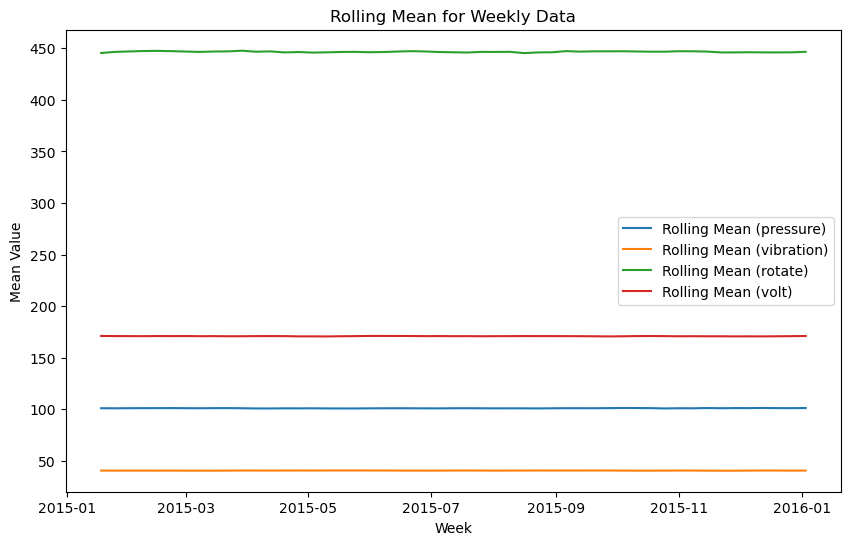

In [50]:
#rolling mean for weekly data 
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

attribute_columns = ['pressure', 'vibration', 'rotate', 'volt']
rolling_mean = df[attribute_columns].resample('W').mean().rolling(window=3).mean()

plt.figure(figsize=(10, 6))
for col in attribute_columns:
    plt.plot(rolling_mean.index, rolling_mean[col], label=f'Rolling Mean ({col})')
plt.xlabel('Week')
plt.ylabel('Mean Value')
plt.title('Rolling Mean for Weekly Data')
plt.legend()
plt.show()

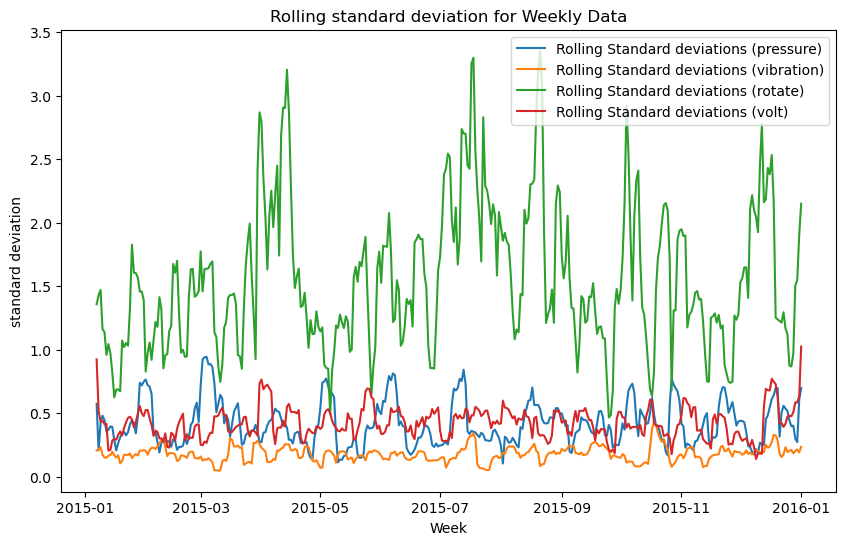

In [3]:
#rolling standard deviation for weekly data
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert 'datetime' column to datetime type
df.set_index('datetime', inplace=True)

attribute_columns = ['pressure', 'vibration', 'rotate', 'volt']
rolling_mean = df[attribute_columns].resample('D').mean().rolling(window=7).std()

plt.figure(figsize=(10, 6))
for col in attribute_columns:
    plt.plot(rolling_mean.index, rolling_mean[col], label=f'Rolling Standard deviations ({col})')
plt.xlabel('Week')
plt.ylabel('standard deviation')
plt.title('Rolling standard deviation for Weekly Data')
plt.legend()
plt.show()

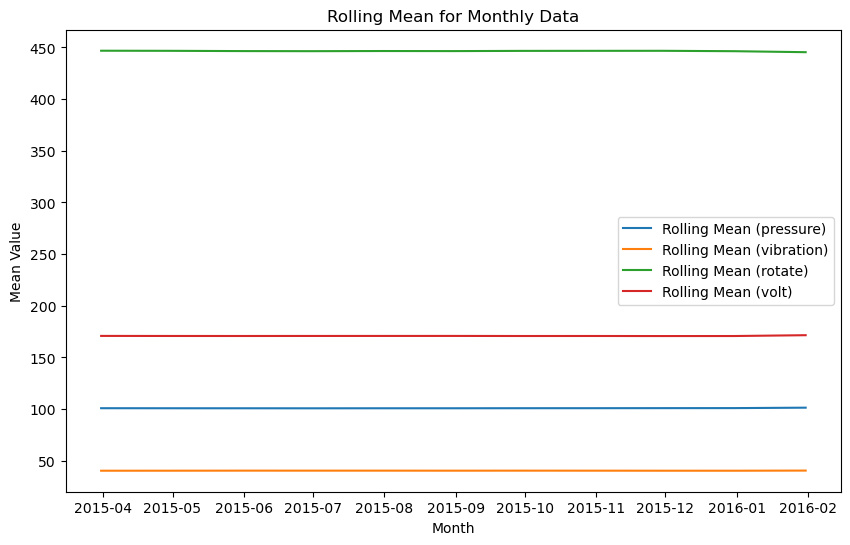

In [66]:
# rolling mean for monthly data; it is a straight line, as the trend in rolling mean of weekly data

df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

attribute_columns = ['pressure', 'vibration', 'rotate', 'volt']
rolling_mean = df[attribute_columns].resample('M').mean().rolling(window=3).mean()

plt.figure(figsize=(10, 6))
for col in attribute_columns:
    plt.plot(rolling_mean.index, rolling_mean[col], label=f'Rolling Mean ({col})')
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Rolling Mean for Monthly Data')
plt.legend()
plt.show()

In [59]:
#ADF test for stationarity and seasonality 
attribute_columns = ['pressure', 'rotate', 'vibration','volt']  
df_resampled = df.resample('D').mean()

for column in attribute_columns:
    data = df_resampled[column]
    result = adfuller(data)
    adf_statistic = result[0]
    p_value = result[1]
    print(f"ADF Statistic for '{column}': {adf_statistic:.4f}")
    print(f"p-value for '{column}': {p_value:.4f}")
    print("-------------------------------------")

ADF Statistic for 'pressure': -9.0511
p-value for 'pressure': 0.0000
-------------------------------------
ADF Statistic for 'rotate': -8.9702
p-value for 'rotate': 0.0000
-------------------------------------
ADF Statistic for 'vibration': -11.1211
p-value for 'vibration': 0.0000
-------------------------------------
ADF Statistic for 'volt': -7.9838
p-value for 'volt': 0.0000
-------------------------------------


In [53]:
#KPSS test for stationarity 
attribute_columns = ['pressure', 'rotate', 'vibration','volt']  
df_resampled = df.resample('D').mean()

for column in attribute_columns:
    data = df_resampled[column]
    result = kpss(data)
    kpss_statistic = result[0]
    p_value = result[1]
    print(f"KPSS Statistic for '{column}': {kpss_statistic:.4f}")
    print(f"p-value for '{column}': {p_value:.4f}")
    print("-------------------------------------")
    

KPSS Statistic for 'pressure': 0.3717
p-value for 'pressure': 0.0894
-------------------------------------
KPSS Statistic for 'rotate': 0.0780
p-value for 'rotate': 0.1000
-------------------------------------
KPSS Statistic for 'vibration': 0.1034
p-value for 'vibration': 0.1000
-------------------------------------
KPSS Statistic for 'volt': 0.1716
p-value for 'volt': 0.1000
-------------------------------------


C:\Users\akapadia\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\akapadia\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\akapadia\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Stepwise fit summary for ARIMA model 

In [55]:
#stepwise fit summary for each attribute to finalise ARIMA model  
attribute_columns = ['pressure', 'rotate', 'vibration', 'volt']

for column in attribute_columns:
    daily_data = df[column].resample('D').mean()
    train_data = daily_data.loc['2015-01-01':'2016-01-01']
    model = pm.auto_arima(train_data, seasonal=False, trace=True, stepwise=True)
    print(f"ARIMA model for attribute '{column}':")
    print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4417.940, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=525.519, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=396.603, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=394.079, Time=0.37 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=399.848, Time=0.47 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=374.882, Time=0.66 sec
 ARIMA(0,0,3)(0,0

# FAILURES DATASET

In [3]:
df = pd.read_csv("PdM_failures.csv")

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df[df['datetime'].dt.year != 2016]

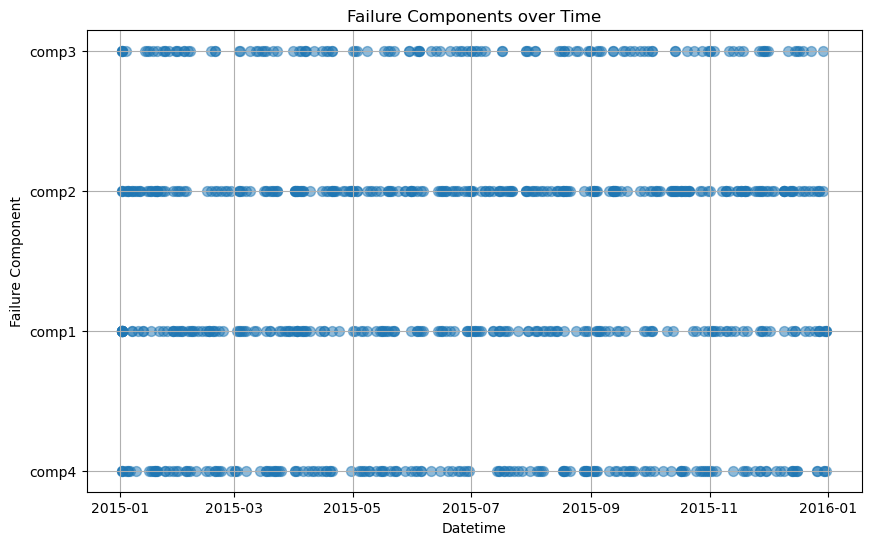

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

plt.figure(figsize=(10, 6))
plt.scatter(df['datetime'], df['failure'], s=50, alpha=0.5)

plt.title('Failure Components over Time')
plt.xlabel('Datetime')
plt.ylabel('Failure Component')
plt.grid(True)

plt.show()

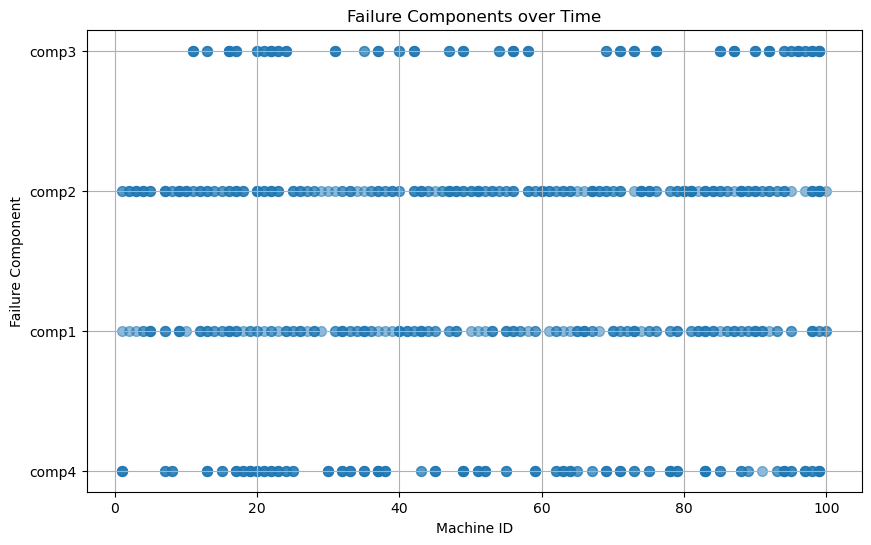

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['machineID'], df['failure'], s=50, alpha=0.5)
# sns.lineplot(data=df, x='machineID', y='failure', hue='failure')
plt.title('Failure Components over Time')
plt.xlabel('Machine ID')
plt.ylabel('Failure Component')
plt.grid(True)

plt.show()

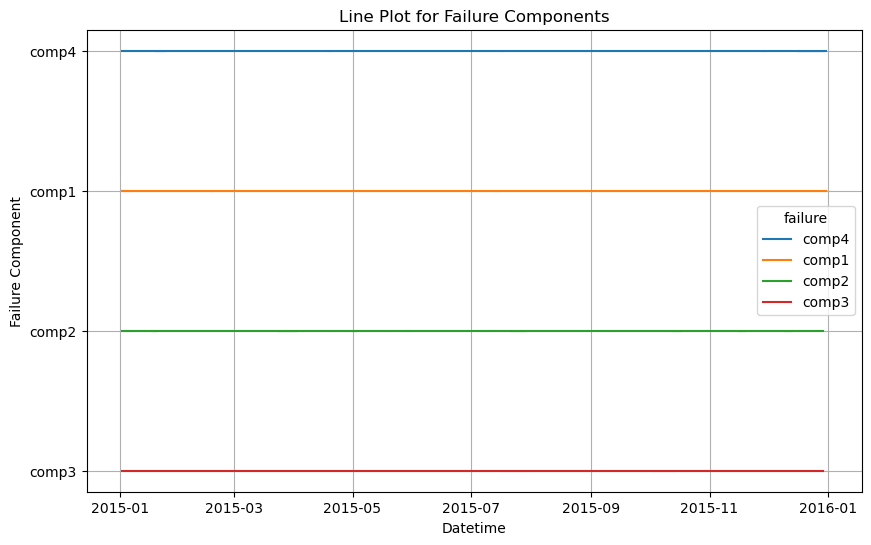

In [8]:
# Plotting the line plot for each failure component
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='datetime', y='failure', hue='failure')

plt.title('Line Plot for Failure Components')
plt.xlabel('Datetime')
plt.ylabel('Failure Component')
plt.grid(True)

plt.show()


# MACHINES DATASET

In [9]:
df = pd.read_csv("PdM_machines.csv")

C:\Users\akapadia\AppData\Local\Temp\ipykernel_25804\3536418557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


<Axes: >

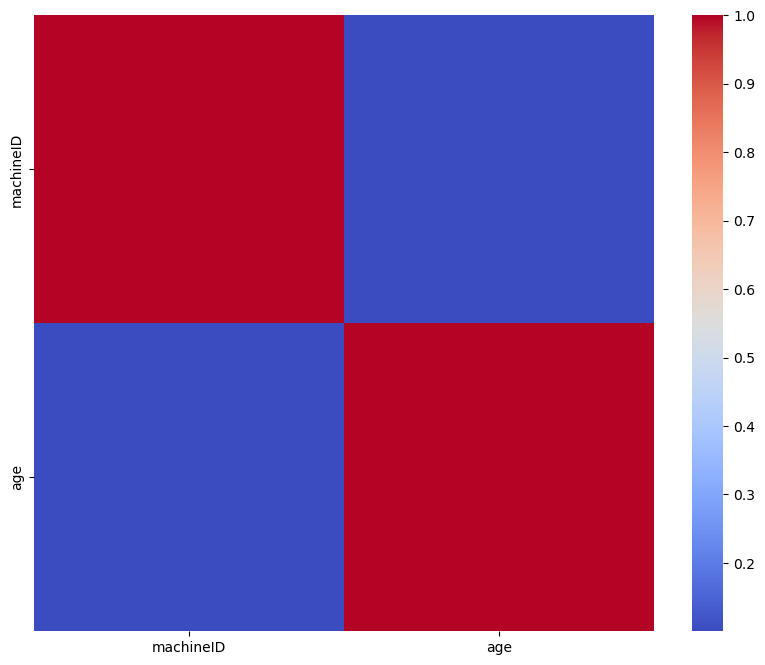

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')

<Axes: xlabel='machineID'>

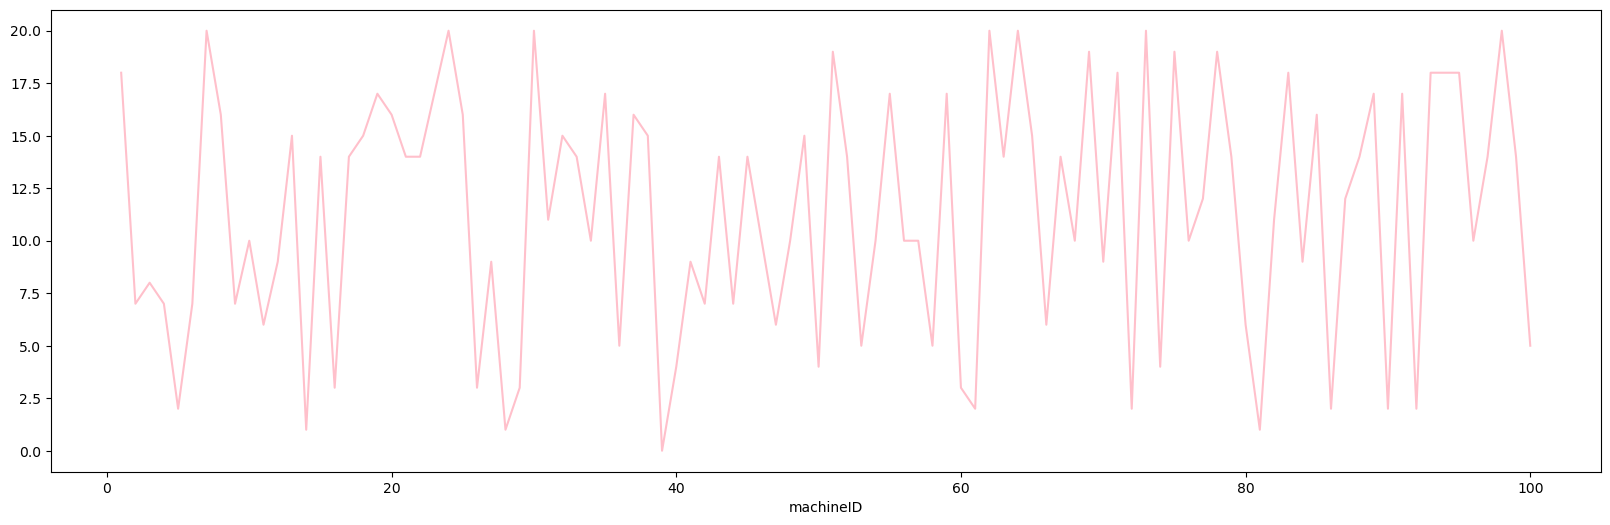

In [11]:
avg_age = df.groupby('machineID')['age'].mean()
plt.figure(figsize=(20,6))
avg_age.plot(kind='line', color='pink')

# FAILURE + TELEMETRY 

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import catboost as cb

In [85]:
df = pd.read_csv("PdM_telemetry.csv")

In [86]:
df1 = pd.read_csv("PdM_machines.csv")

In [87]:
df2 = pd.read_csv("PdM_failures.csv")

In [88]:
df3 = pd.merge(df,df2, how='outer')
df3.shape

(876142, 7)

In [93]:
df3['failure'] = df3['failure'].astype(str)  
df4['failure'] = df4['failure'].astype(str)  

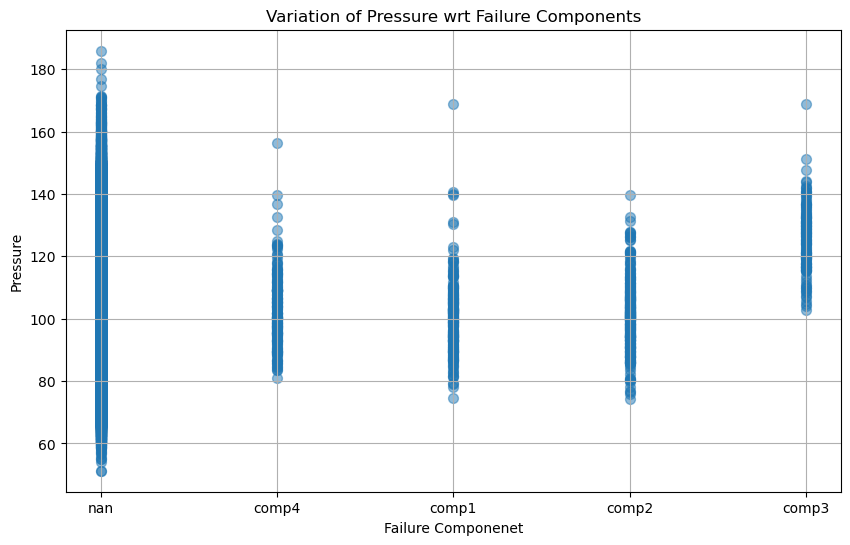

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['failure'], df3['pressure'], s=50, alpha=0.5)

plt.title('Variation of Pressure wrt Failure Components')
plt.xlabel('Failure Componenet')
plt.ylabel('Pressure')
plt.grid(True)

plt.show()

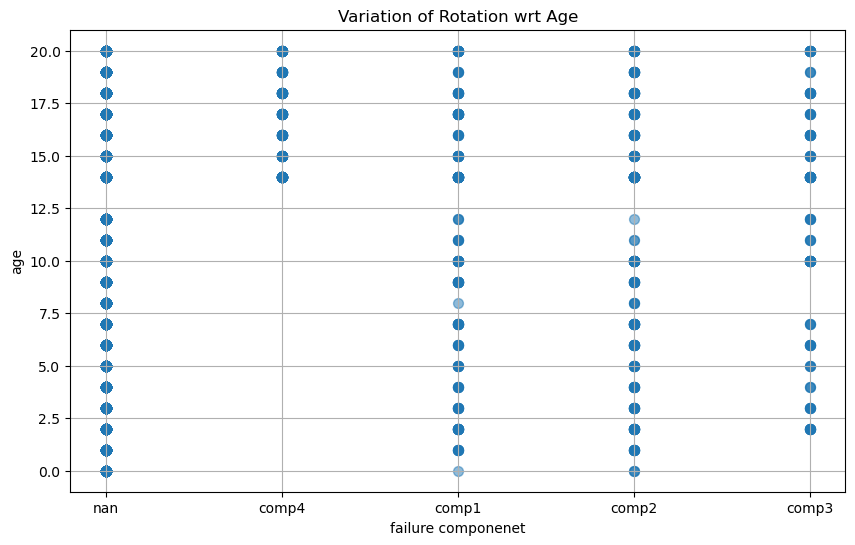

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(df4['failure'], df4['age'], s=50, alpha=0.5)

plt.title('Variation of Rotation wrt Age')
plt.xlabel('failure componenet')
plt.ylabel('age')
plt.grid(True)

plt.show()

In [92]:
df4 = pd.merge(df3, df1)
df4.head()

,datetime,machineID,volt,rotate,pressure,vibration,failure,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,nan,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,nan,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,nan,model3,18
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,nan,model3,18
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,nan,model3,18


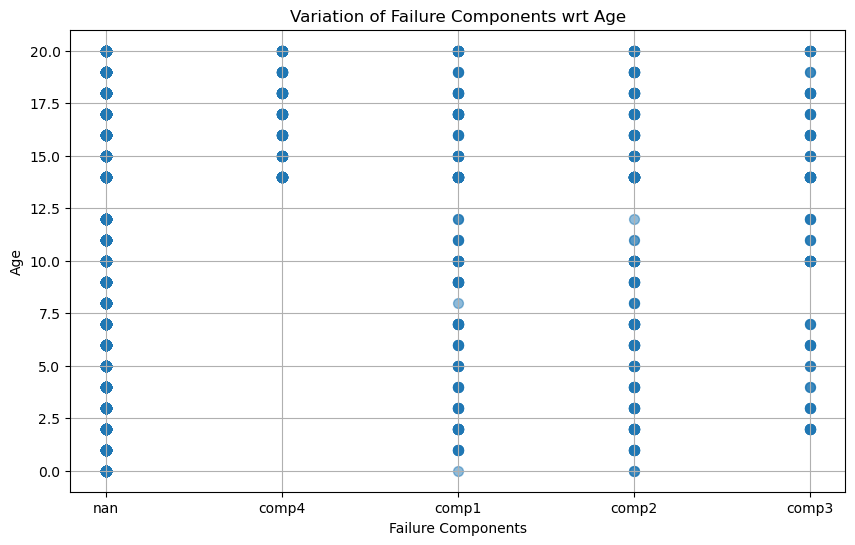

In [95]:
df4['failure'] = df4['failure'].astype(str)  

plt.figure(figsize=(10, 6))
plt.scatter(df4['failure'], df4['age'], s=50, alpha=0.5)

plt.title('Variation of Failure Components wrt Age')
plt.xlabel('Failure Components')
plt.ylabel('Age')
plt.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df4['age'], df4['pressure'], s=50, alpha=0.5)

plt.title('Variation of Pressure wrt Age')
plt.xlabel('Age ')
plt.ylabel('Pressure')
plt.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df4['age'], df4['rotate'], s=50, alpha=0.5)

plt.title('Variation of Rotation wrt Age')
plt.xlabel('Age')
plt.ylabel('Rotation')
plt.grid(True)

plt.show()

In [ ]:
plt.bar(df4['failure'],df4['pressure'])
plt.ylabel("pressure")
plt.xlabel("component failed")
plt.figure(figsize=(20,10))
plt.show()

# MODEL BUILDING 

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


In [42]:
df = pd.read_csv("PdM_telemetry.csv")

In [43]:
df5 = pd.read_csv("PdM_failures.csv")

In [44]:
df['datetime'] = pd.to_datetime(df['datetime'])

telemetry_daily = df.groupby(['machineID', pd.Grouper(key='datetime', freq='D')]).sum().reset_index()

telemetry_daily['pressure'] = telemetry_daily['pressure'] / 24
telemetry_daily['volt'] = telemetry_daily['volt'] / 24
telemetry_daily['vibration'] = telemetry_daily['vibration'] / 24
telemetry_daily['rotate'] = telemetry_daily['rotate'] / 24

telemetry_daily = telemetry_daily.dropna()

print(telemetry_daily.shape)
print(telemetry_daily.head())

(36600, 6)
   machineID   datetime        volt      rotate    pressure  vibration
0          1 2015-01-01  125.682400  330.386496   73.891759  30.037217
1          1 2015-01-02  169.795758  446.832666   98.454608  39.271645
2          1 2015-01-03  171.862244  459.204742   97.998233  48.074091
3          1 2015-01-04  174.792428  448.743201  101.452266  52.190268
4          1 2015-01-05  171.018408  454.822750  102.363114  43.330311


In [45]:
df5['failure']= df5['failure'].replace('comp1',1)
df5['failure']= df5['failure'].replace('comp2',1)
df5['failure']= df5['failure'].replace('comp3',1)
df5['failure']= df5['failure'].replace('comp4',1)

In [46]:
df5['failure']=df5['failure'].astype(str)
print(df5['failure'])

0      1
1      1
2      1
3      1
4      1
      ..
756    1
757    1
758    1
759    1
760    1
Name: failure, Length: 761, dtype: object


In [47]:
df5['datetime'] = pd.to_datetime(df5['datetime'])  
df5.set_index('datetime', inplace=True)  

df5 = df5.groupby(['machineID', pd.Grouper(freq='D')]).sum()  
df5 = df5.reset_index()  

df5['datetime'] = df5['datetime'].dt.normalize()  
df5.head()


,machineID,datetime,failure
0,1,2015-01-05,1
1,1,2015-03-06,1
2,1,2015-04-20,1
3,1,2015-06-19,1
4,1,2015-09-02,1


In [48]:
merged_df = pd.merge(telemetry_daily, df5, on=['machineID', 'datetime'], how='left')

print(merged_df.shape)
print(merged_df.head())

(36600, 7)
   machineID   datetime        volt      rotate    pressure  vibration failure
0          1 2015-01-01  125.682400  330.386496   73.891759  30.037217     NaN
1          1 2015-01-02  169.795758  446.832666   98.454608  39.271645     NaN
2          1 2015-01-03  171.862244  459.204742   97.998233  48.074091     NaN
3          1 2015-01-04  174.792428  448.743201  101.452266  52.190268     NaN
4          1 2015-01-05  171.018408  454.822750  102.363114  43.330311       1


In [49]:
merged_df['failure']=merged_df['failure'].astype(str)
print(merged_df['failure'])

0        nan
1        nan
2        nan
3        nan
4          1
        ... 
36595    nan
36596    nan
36597    nan
36598    nan
36599    nan
Name: failure, Length: 36600, dtype: object


In [50]:
merged_df['failure']= merged_df['failure'].replace('comp1',1)
merged_df['failure']= merged_df['failure'].replace('comp2',1)
merged_df['failure']= merged_df['failure'].replace('comp3',1)
merged_df['failure']= merged_df['failure'].replace('comp4',1)
merged_df['failure']= merged_df['failure'].replace('comp2comp4',1)
merged_df['failure']= merged_df['failure'].replace('comp2comp3',1)
merged_df['failure']= merged_df['failure'].replace('comp1comp2',1)
merged_df['failure']= merged_df['failure'].replace('comp1comp4',1)
merged_df['failure']= merged_df['failure'].replace('comp1comp3',1)
merged_df['failure']= merged_df['failure'].replace('comp3comp4',1)
merged_df['failure']= merged_df['failure'].replace('1',1)
merged_df['failure']= merged_df['failure'].replace('nan',0)
merged_df['failure']= merged_df['failure'].replace('11',1)

In [51]:
merged_df.shape

(36600, 7)

In [52]:
merged_df['failure'].value_counts()

0    35882
1      718
Name: failure, dtype: int64

In [53]:
# merged_df['datetime']=merged_df['datetime'].astype(str)
print(merged_df)
merged_df['datetime']= pd.to_datetime(merged_df['datetime'])
merged_df.set_index('datetime', inplace=True)

       machineID   datetime        volt      rotate    pressure  vibration  \
0              1 2015-01-01  125.682400  330.386496   73.891759  30.037217   
1              1 2015-01-02  169.795758  446.832666   98.454608  39.271645   
2              1 2015-01-03  171.862244  459.204742   97.998233  48.074091   
3              1 2015-01-04  174.792428  448.743201  101.452266  52.190268   
4              1 2015-01-05  171.018408  454.822750  102.363114  43.330311   
...          ...        ...         ...         ...         ...        ...   
36595        100 2015-12-28  170.982029  454.875385   97.864404  39.221774   
36596        100 2015-12-29  167.114444  459.097599   97.531682  40.117173   
36597        100 2015-12-30  168.613777  455.140822   98.415400  39.995452   
36598        100 2015-12-31  168.469994  463.241909  101.846119  38.826901   
36599        100 2016-01-01   51.243049  129.993912   28.438697  12.856743   

       failure  
0            0  
1            0  
2           

In [54]:
#RANDOM FOREST 

X = merged_df.drop('failure', axis=1)  
y = merged_df['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

#train accuracy
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

#test accuracy
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Accuracy: 0.9804644808743169
Confusion Matrix: [[7173    1]
 [ 142    4]]
Train Accuracy: 0.9997950819672131
Test Accuracy: 0.9804644808743169


In [55]:
#SVC - Support Vector Classification 

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: ",accuracy_score(y_test,y_pred))
# print(f1_score(y_test,y_pred))

#train accuracy
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

#test accuracy
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

[[7174    0]
 [ 146    0]]
Accuracy:  0.9800546448087432
Train Accuracy: 0.9804644808743169
Test Accuracy: 0.9800546448087432


In [56]:
#LOGISTIC REGRESSION --> solver = saga

from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
lr = LogisticRegression(solver='saga', class_weight='balanced')
lr.fit(X_train, y_train)

# X = df5.drop('failure')  
# y = df5['failure']

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
# f1_test = f1_score(y_test, pred_test)
# print('The f1 score for the testing data:', f1_test)
o=0
z=0
# for i in pred_test:
#     if i==1:
#         o+=1
#     else:
#         z+=1
# print(o,z)

print("Accuracy Score " , accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test, pred_test))

y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Accuracy Score  0.9800546448087432
[[7174    0]
 [ 146    0]]
Train Accuracy: 0.9804644808743169
Test Accuracy: 0.9800546448087432


C:\Users\akapadia\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
#LOGISTIC REGRESSION --> solver = newton-cg

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

X = merged_df.drop('failure', axis=1)  
y = merged_df['failure']

pred_test = lr.predict(X_test)

print("Accuracy Score " , accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test, pred_test))

#train accuracy 
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

#test accuracy
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Accuracy Score  0.7295081967213115
[[5255 1919]
 [  61   85]]
Train Accuracy: 0.7303620218579235
Test Accuracy: 0.7295081967213115


In [60]:
#LOGISTIC REGRESSION --> solver = saga

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga', class_weight='balanced')
lr.fit(X_train, y_train)

X = merged_df.drop('failure', axis=1)  
y = merged_df['failure']

pred_test = lr.predict(X_test)

print("Accuracy Score " , accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test, pred_test))

#train accuracy 
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

#test accuracy
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Accuracy Score  0.3950819672131147
[[2767 4407]
 [  21  125]]
Train Accuracy: 0.3968237704918033
Test Accuracy: 0.3950819672131147


C:\Users\akapadia\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [61]:
#CATBOOST -- train accuracy 

from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

y_train_pred = catboost_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

Learning rate set to 0.043567
0:	learn: 0.6111189	total: 162ms	remaining: 2m 41s
1:	learn: 0.5387699	total: 175ms	remaining: 1m 27s
2:	learn: 0.4781302	total: 183ms	remaining: 1m
3:	learn: 0.4274211	total: 189ms	remaining: 47s
4:	learn: 0.3805041	total: 194ms	remaining: 38.7s
5:	learn: 0.3389870	total: 199ms	remaining: 33s
6:	learn: 0.3060394	total: 204ms	remaining: 29s
7:	learn: 0.2738675	total: 210ms	remaining: 26s
8:	learn: 0.2493463	total: 217ms	remaining: 23.9s
9:	learn: 0.2300580	total: 222ms	remaining: 22s
10:	learn: 0.2118406	total: 228ms	remaining: 20.5s
11:	learn: 0.1956709	total: 233ms	remaining: 19.2s
12:	learn: 0.1829762	total: 238ms	remaining: 18s
13:	learn: 0.1716288	total: 243ms	remaining: 17.1s
14:	learn: 0.1614566	total: 249ms	remaining: 16.3s
15:	learn: 0.1529160	total: 254ms	remaining: 15.6s
16:	learn: 0.1457665	total: 259ms	remaining: 15s
17:	learn: 0.1391409	total: 265ms	remaining: 14.4s
18:	learn: 0.1335106	total: 270ms	remaining: 13.9s
19:	learn: 0.1281009	total

In [62]:
#CATBOOST -- test accuracy 

from catboost import CatBoostRegressor, CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

y_test_pred = catboost_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Learning rate set to 0.043567
0:	learn: 0.6111189	total: 8.11ms	remaining: 8.1s
1:	learn: 0.5387699	total: 16.1ms	remaining: 8.04s
2:	learn: 0.4781302	total: 23.3ms	remaining: 7.74s
3:	learn: 0.4274211	total: 30.8ms	remaining: 7.67s
4:	learn: 0.3805041	total: 37.4ms	remaining: 7.45s
5:	learn: 0.3389870	total: 43.9ms	remaining: 7.27s
6:	learn: 0.3060394	total: 49.7ms	remaining: 7.04s
7:	learn: 0.2738675	total: 55ms	remaining: 6.82s
8:	learn: 0.2493463	total: 60.8ms	remaining: 6.69s
9:	learn: 0.2300580	total: 64.7ms	remaining: 6.41s
10:	learn: 0.2118406	total: 70.7ms	remaining: 6.35s
11:	learn: 0.1956709	total: 76.5ms	remaining: 6.3s
12:	learn: 0.1829762	total: 82.2ms	remaining: 6.24s
13:	learn: 0.1716288	total: 87.6ms	remaining: 6.17s
14:	learn: 0.1614566	total: 93ms	remaining: 6.11s
15:	learn: 0.1529160	total: 98.3ms	remaining: 6.05s
16:	learn: 0.1457665	total: 104ms	remaining: 6.01s
17:	learn: 0.1391409	total: 110ms	remaining: 5.98s
18:	learn: 0.1335106	total: 115ms	remaining: 5.93s
1

In [63]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = merged_df.drop('failure', axis=1)
y = merged_df['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

class_counts = y_train.value_counts()
class_weights = class_counts.sum() / (len(class_counts) * class_counts)

catboost_model = cb.CatBoostClassifier(iterations=100,
                                       random_state=42,
                                       eval_metric='Accuracy',
                                       task_type='CPU',
                                       verbose=50,
                                       class_weights=class_weights)

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred = catboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

Learning rate set to 0.176903
0:	learn: 0.7407732	test: 0.7313200	best: 0.7313200 (0)	total: 3.27ms	remaining: 323ms
50:	learn: 0.8447889	test: 0.7773130	best: 0.7874628 (38)	total: 146ms	remaining: 140ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7874627647
bestIteration = 38

Shrink model to first 39 iterations.
Accuracy: 0.8009289617486339
[[14405  3568]
 [   75   252]]
